<a href="https://colab.research.google.com/github/dubalker11/exoplanet/blob/main/ExoplanetTransit_benwalker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np #import required packages
import matplotlib.pyplot as plt
import astropy.io.ascii

In [4]:
from google.colab import files
uploaded = files.upload()

Saving HD209458b.txt to HD209458b.txt


In [7]:
#import data
dat = astropy.io.ascii.read("HD209458b.txt")

Text(0, 0.5, 'Normalize Flux')

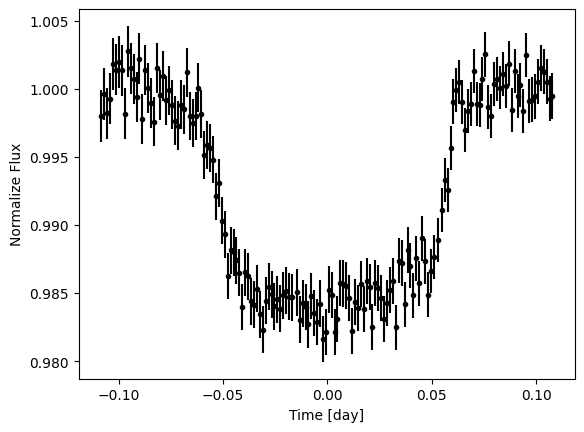

In [8]:
time = dat["col1"] - np.median(dat["col1"]) #create x-axis
rel_mag = dat["col2"]
flux = 2.514**(1.0 - rel_mag) #modify rel_mag/col2
err = dat["col3"] #read data for the error bar
plt.errorbar(time, flux, yerr = err, marker = ".", color = "black", linestyle = "none")
plt.xlabel("Time [day]")
plt.ylabel("Normalize Flux")

In [17]:
def box_model(t, center_time, duration, depth, delta_flux): #box model with listed parameters
  f = np.zeros(np.shape(t))
  ind = np.where(np.abs(t - center_time) < (duration / 2.0))
  f[ind] = 1.0 + delta_flux - depth
  ind = np.where(np.abs(t - center_time) >= (duration / 2.0))
  f[ind] = 1.0 + delta_flux
  return(f)

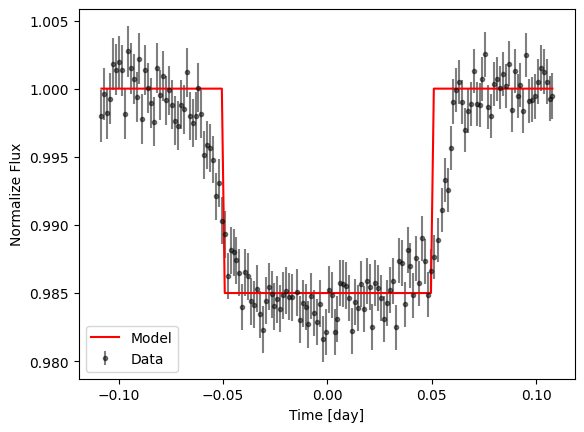

In [10]:
center_time, duration, depth, delta_flux = 0.0, 0.1, 0.015, 0.0 #give appropriate values
model = box_model(time, center_time, duration, depth, delta_flux)
plt.errorbar(time, flux, yerr = err, marker = ".", color = "black", linestyle = "none", alpha = 0.5, label = "Data")
plt.plot(time, model, color = "red", label = "Model")
plt.xlabel("Time [day]")
plt.ylabel("Normalize Flux")
plt.legend();

In [14]:
def calc_reduced_Chi2(O, C, err, n, m): #needed values
  Chi2 = np.sum((O - C)**2 / err**2) #formula for Chi2 test statistic
  reduced_Chi2 = Chi2 / (n - m) #formuka for reduced Chi2 test statistic
  return(reduced_Chi2)

In [16]:
print("reduced Chi2 =", calc_reduced_Chi2(flux, model, err, len(time), 4.0))

reduced Chi2 = 2.6523315235742584


In [20]:
def log_likelihood(theta, x, y, yerr): #likelihood function
    center_time, duration, depth, delta_flux = theta
    model = box_model(time, center_time, duration, depth, delta_flux)
    sigma2 = yerr**2
    return -0.5 * np.sum((y - model) ** 2 / sigma2 + np.log(sigma2))

In [21]:
def log_prior(theta): #prior(or base) function
    center_time, duration, depth, delta_flux = theta
    if -0.05 < center_time < 0.05 and 0.0 < duration < 1.0 and 0.0 < depth < 1.0 and -0.1 < delta_flux < 0.1:
        return 0.0
    return -np.inf

def log_probability(theta, x, y, yerr): #probability function
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, x, y, yerr)
